In [1]:
# In this notebook, we explore the DMA buffer size impact by fixing the traffic input rate

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import causallearn

from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import io
import os
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
import matplotlib as mp

In [3]:
import pandas as pd

# Path to your CSV file
csv_file = '..\\datasets\\averages_summary.csv'

# Read the CSV file
df = pd.read_csv(csv_file, header=[0, 1])

# Throughput efficiency

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_throughput_efficiency(csv_file, pkt_size):
    fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
    plt.style.use('classic')

    # Read the CSV file considering it has two header rows
    df = pd.read_csv(csv_file)

    row_headers = [f'fixed_rate_{pkt_size}B-256.csv', f'fixed_rate_{pkt_size}B-512.csv', f'fixed_rate_{pkt_size}B-1024.csv', f'fixed_rate_{pkt_size}B-4096.csv']
    df_filtered = df[df['File'].isin(row_headers)].copy()

    X_LABEL = ["256", "512", "1024", "4096"]
   # Create a mapping of file names to their indices in row_headers
    file_to_index = {file: index for index, file in enumerate(row_headers)}

    # Sort df_filtered based on the order in row_headers
    df_filtered['order'] = df_filtered['File'].map(file_to_index)
    df_filtered.sort_values(by='order', inplace=True)
    
    # Extract the data
    input_rate = df_filtered['input_rate'].tolist()
    print(f'input_rate:{input_rate}')
    output_rate = df_filtered['output_rate'].tolist()
    print(f'efficiency:{[y/x for x, y in zip(input_rate, output_rate)]}')
    print(f'output_rate:{output_rate}')
    # Plot
    ax.plot(X_LABEL, [y/x for x, y in zip(input_rate, output_rate)], marker='o', markersize=6, c='k', linestyle='-', linewidth=1, dashes=(5, 3), label='Throughput efficiency')
    ax.set_xlabel(f'DMA buffer size (pkt= {pkt_size})', size='14')
    ax.set_ylabel('Efficiency', size='14')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    ax.set_ylim(0.5,1)
    ax.grid()
    ax.legend(loc='lower right', fontsize=12)
    X_LABEL_numeric = [int(x) for x in X_LABEL]
#   ax.set_xlim(left=min(X_LABEL_numeric) - 1, right=max(X_LABEL_numeric) + 1) 
    # Show the plot
    plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
    plt.show()

input_rate:[6921.192103366992, 6877.643259795025, 6809.065063834612, 6878.782214675805]
efficiency:[0.9717901791394838, 0.9796220254603395, 0.9784011498128787, 0.9971172651176244]
output_rate:[6725.94651398979, 6737.490820554054, 6661.997087606487, 6858.952509237295]


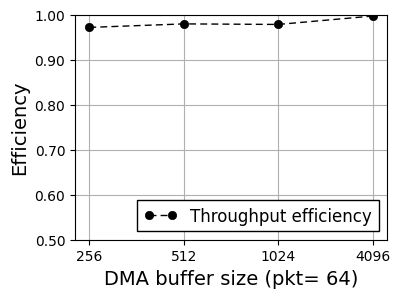

input_rate:[9489.13930281653, 9584.475281787856, 9542.02466799886, 9451.996551514952]
efficiency:[0.9859277687955431, 0.998423503235286, 0.9896345812411659, 0.9962600185376459]
output_rate:[9355.605940615997, 9569.365387514636, 9443.117586507926, 9416.646259630052]


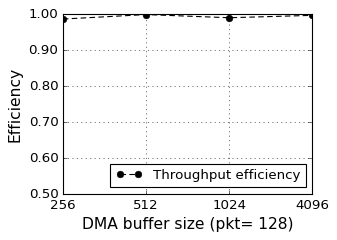

input_rate:[9919.7498332687, 9923.514937132382, 9912.83525886042, 9909.510024636706]
efficiency:[0.9860896228955881, 0.9985297655683104, 0.9845850893702885, 0.9748790650798631]
output_rate:[9781.762372306504, 9908.925043788424, 9760.029789258033, 9660.573868217363]


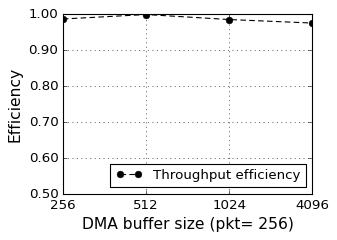

input_rate:[9942.72626668225, 9925.406229510994, 9934.253019196643, 9907.170261860903]
efficiency:[0.9933078197607912, 0.9921369391721757, 0.9940640866745031, 0.6959369224621893]
output_rate:[9876.187750436497, 9847.362156587484, 9875.284154321136, 6894.765582348399]


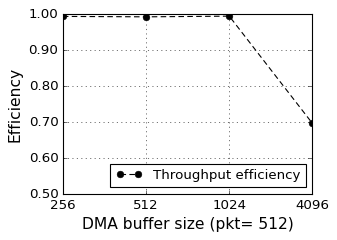

input_rate:[9967.724874246282, 9958.959414452454, 9962.284017183849, 9914.573628123318]
efficiency:[0.9928135106168569, 0.8366275935130573, 0.8927235219283789, 0.29479383588181685]
output_rate:[9896.09192526342, 8331.940248807563, 8893.565274271165, 2922.755190967175]


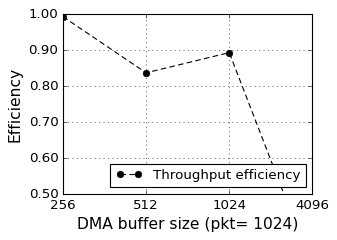

input_rate:[9972.626526965643, 9968.445599974484, 9966.69283962294, 9955.893248932329]
efficiency:[0.9897407366485036, 0.3998572742519282, 0.3950460675165658, 0.25819344574918685]
output_rate:[9870.314725119384, 3985.955486134424, 3937.302812438557, 2570.546383452905]


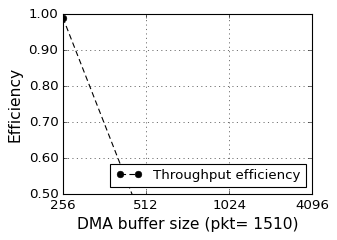

In [5]:
# throughput efficiency
csv_file_path = '..\\datasets\\averages_summary.csv'  # Replace with your actual file path
plot_throughput_efficiency(csv_file_path, 64)  
plot_throughput_efficiency(csv_file_path, 128)  
plot_throughput_efficiency(csv_file_path, 256)
plot_throughput_efficiency(csv_file_path, 512) 
plot_throughput_efficiency(csv_file_path, 1024)
plot_throughput_efficiency(csv_file_path, 1510)

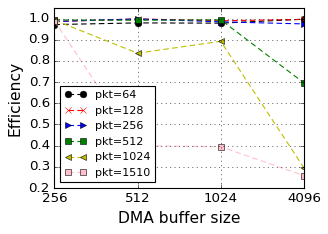

In [6]:
fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
plt.style.use('classic')

X_LABEL = ["256", "512", "1024", "4096"]

ef_64 = [0.9717901791394838, 0.9796220254603395, 0.9784011498128787, 0.9971172651176244]

ef_128 = [0.9859277687955431, 0.998423503235286, 0.9896345812411659, 0.9962600185376459]
ef_256 = [0.9860896228955881, 0.9985297655683104, 0.9845850893702885, 0.9748790650798631]
ef_512 = [0.9933078197607912, 0.9921369391721757, 0.9940640866745031, 0.6959369224621893]
ef_1024 = [0.9928135106168569, 0.8366275935130573, 0.8927235219283789, 0.29479383588181685]
ef_1510 = [0.9897407366485036, 0.3998572742519282, 0.3950460675165658, 0.25819344574918685]

# Plot
ax.plot(X_LABEL, ef_64, marker='o', markersize=6, c='k', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=64')
ax.plot(X_LABEL, ef_128, marker='x', markersize=6, c='r', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=128')
ax.plot(X_LABEL, ef_256, marker='>', markersize=6, c='b', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=256')
ax.plot(X_LABEL, ef_512, marker='s', markersize=6, c='g', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=512')
ax.plot(X_LABEL, ef_1024, marker='<', markersize=6, c='y', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=1024')
ax.plot(X_LABEL, ef_1510, marker='s', markersize=6, c='pink', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=1510')
ax.set_xlabel(f'DMA buffer size', size='14')
ax.set_ylabel('Efficiency', size='14')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}'.format(x)))
ax.set_ylim(0.2,1.05)
ax.grid()
ax.legend(loc='lower left', fontsize=10)

ax.set_xticks(X_LABEL)

# Show the plot
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#save figure
folder_path = '..\\figure\\bridge'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'effiency_rate_buffer.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()

# Rate comparasion

In [7]:
import matplotlib.pyplot as plt


def rate_comparasion(csv_file, pkt_size):
    # Read the CSV file considering it has two header rows
    df = pd.read_csv(csv_file)

    row_headers = [f'fixed_rate_{pkt_size}B-256.csv', f'fixed_rate_{pkt_size}B-512.csv', f'fixed_rate_{pkt_size}B-1024.csv', f'fixed_rate_{pkt_size}B-4096.csv']
    df_filtered = df[df['File'].isin(row_headers)].copy()
    file_to_index = {file: index for index, file in enumerate(row_headers)}
    df_filtered['order'] = df_filtered['File'].map(file_to_index)
    df_filtered.sort_values(by='order', inplace=True)
    
    
    X_LABEL = [2.56, 5.12, 10.24, 40.96]
    input_rate = df_filtered['input_rate'].tolist()
    output_rate = df_filtered['output_rate'].tolist()

                     
    x_labels = ['256', '512', '1024','4096']
    # Set the width of the bars
    bar_width = 0.15

    # Calculate the positions for the bars on the x-axis
    x_pos_scale = 0.7
    x_pos = [x * x_pos_scale for x in range(len(input_rate))]
    x_pos_input_rate = [x - bar_width/2 for x in x_pos]
    x_pos_output_rate = [x + bar_width/2 for x in x_pos]

    # Define custom colors for the bars
    color_input = 'lightblue'
    color_output = '#FFAAAA'

    # Create the figure and axis with adjusted margins
    fig, ax = plt.subplots(facecolor='white', figsize=(7, 3))
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

    # Create the clustered bars
    ax.bar(x_pos_input_rate, [x/1000 for x in input_rate], width=bar_width, label='Input rate', color=color_input)
    ax.bar(x_pos_output_rate, [x/1000 for x in output_rate], width=bar_width, label='Throughput', color=color_output, hatch='//', edgecolor="black")

    # Set the x-axis ticks and labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels)

    # Set custom x-limits to reduce the distance from 0 to the first bar
    ax.set_xlim(x_pos[0] - bar_width-0.1, x_pos[-1] + bar_width+0.1)
    ax.set_ylim(0,10.5)
    # Set the labels and title
    ax.set_ylabel('Rate (Gbps)',fontsize=16)
    ax.set_xlabel('RX Descriptors',fontsize=17)
    ax.set_title(f'pkt={pkt_size}B',fontsize=17)
    ax.set_ylim(0,12)
    # Add a legend
    ax.legend(loc="lower left", fontsize=16)
  
    # Show the plot
    #save figure
    folder_path = '..\\figure\\bridge'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_path = os.path.join(folder_path, f'pktsize_compar_pkt{pkt_size}.pdf' )
    plt.savefig(file_path,bbox_inches='tight')
    plt.show()

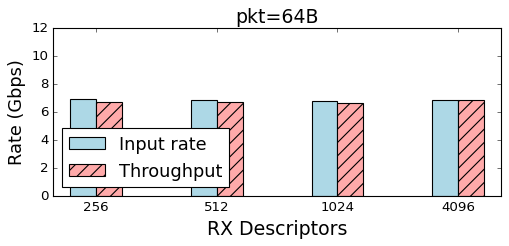

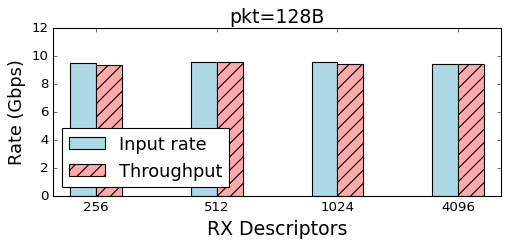

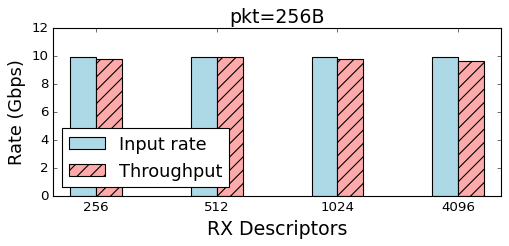

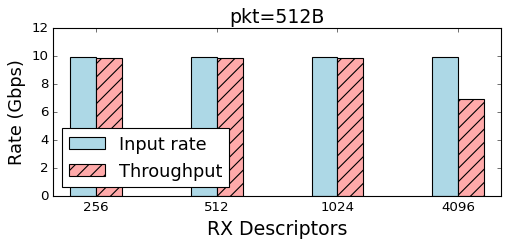

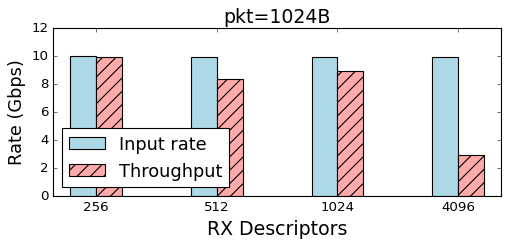

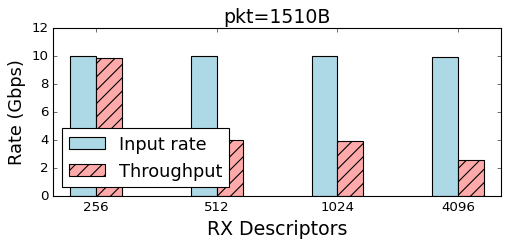

In [8]:
# throughput efficiency
csv_file_path = '..\\datasets\\averages_summary.csv' 
rate_comparasion(csv_file_path, 64)  
rate_comparasion(csv_file_path, 128)  
rate_comparasion(csv_file_path, 256)
rate_comparasion(csv_file_path, 512)  
rate_comparasion(csv_file_path, 1024)
rate_comparasion(csv_file_path, 1510)

# Plot latency

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_latency(csv_file, pkt_size):
    fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
    plt.style.use('classic')

    # Read the CSV file considering it has two header rows
    df = pd.read_csv(csv_file)

    row_headers = [f'fixed_rate_{pkt_size}B-256.csv', f'fixed_rate_{pkt_size}B-512.csv', f'fixed_rate_{pkt_size}B-1024.csv', f'fixed_rate_{pkt_size}B-4096.csv']
    df_filtered = df[df['File'].isin(row_headers)].copy()
    file_to_index = {file: index for index, file in enumerate(row_headers)}

    # Sort df_filtered based on the order in row_headers
    df_filtered['order'] = df_filtered['File'].map(file_to_index)
    df_filtered.sort_values(by='order', inplace=True)

    X_LABEL = ["256", "512", "1024", "4096"]
    latency = df_filtered['latency'].tolist()
    print(f'latency:{latency}')

    # Plot
    ax.plot(X_LABEL, [x for x in latency], marker='o', markersize=6, c='k', linestyle='-', linewidth=1, dashes=(5, 3), label='Latency')
    ax.set_xlabel(f'DMA buffer size (pkt= {pkt_size})', size='14')
    ax.set_ylabel('Latency', size='14')
    ax.set_ylim(0,16000)
    ax.grid()
    ax.legend(loc='upper left', fontsize=12)

    # Show the plot
    plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
    plt.show()

latency:[1004.0023006993008, 815.0958673647469, 636.4006108202443, 537.8703951048951]


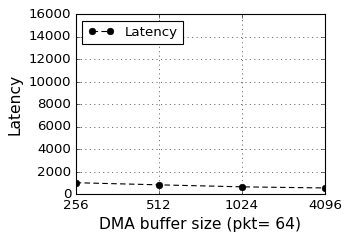

latency:[466.5770879120879, 64.67987500000001, 92.34107890222984, 60.09906849315068]


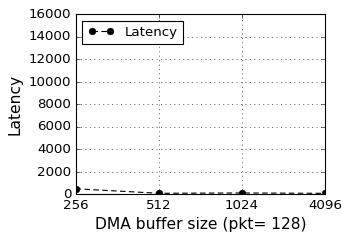

latency:[479.3799982847341, 205.6383165467626, 625.6803363309352, 895.0075565068494]


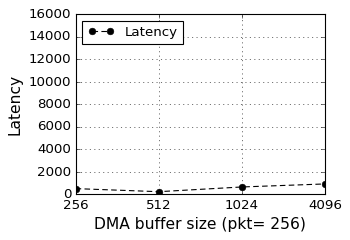

latency:[3051.184297435898, 520.5265188509874, 554.5714280639432, 6608.103851851851]


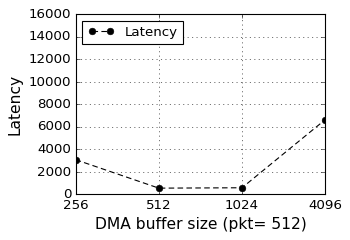

latency:[318.50822495606326, 4796.679062166963, 2282.590615114236, 14207.629870466322]


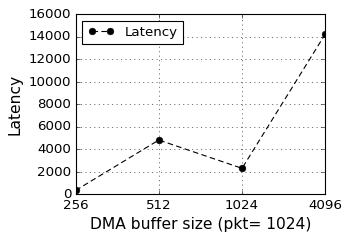

latency:[2477.8201265164644, 10036.52432423208, 10729.07503938356, 14960.59114089347]


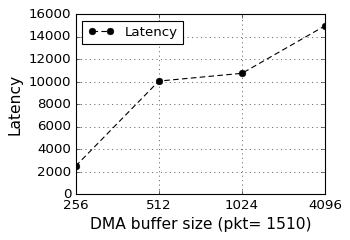

In [10]:
# throughput efficiency
csv_file_path = '..\\datasets\\averages_summary.csv'  # Replace with your actual file path
plot_latency(csv_file_path, 64)  
plot_latency(csv_file_path, 128)  
plot_latency(csv_file_path, 256)
plot_latency(csv_file_path, 512) 
plot_latency(csv_file_path, 1024)
plot_latency(csv_file_path, 1510)

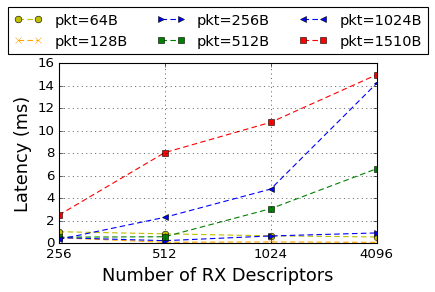

In [11]:
fig, ax = plt.subplots(facecolor='white', figsize=(5.3,3))
plt.style.use('classic')

X_LABEL = ["256", "512", "1024", "4096"]

ef_64 = [1004.0023006993008, 815.0958673647469, 636.4006108202443, 537.8703951048951]

ef_128 = [466.5770879120879, 64.67987500000001, 92.34107890222984, 60.09906849315068]
ef_256 =[479.3799982847341, 205.6383165467626, 625.6803363309352, 895.0075565068494]
ef_512 = [ 520.5265188509874, 554.5714280639432, 3051.184297435898, 6608.103851851851]
ef_1024 =[318.50822495606326, 2282.590615114236, 4796.679062166963, 14207.629870466322]
ef_1510 =[2477.8201265164644, 8036.52432423208, 10729.07503938356, 14960.59114089347]

# Plot
ax.plot(X_LABEL, [i/1000 for i in ef_64], marker='o', markersize=6, c='y', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=64B')
ax.plot(X_LABEL, [i/1000 for i in ef_128], marker='x', markersize=6, c='orange', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=128B')
ax.plot(X_LABEL, [i/1000 for i in ef_256], marker='>', markersize=6, c='b', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=256B')
ax.plot(X_LABEL, [i/1000 for i in ef_512], marker='s', markersize=6, c='g', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=512B')
ax.plot(X_LABEL, [i/1000 for i in ef_1024], marker='<', markersize=6, c='b', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=1024B')
ax.plot(X_LABEL, [i/1000 for i in ef_1510], marker='s', markersize=6, c='red', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=1510B')

ax.set_xlabel(f'Number of RX Descriptors', size='16')
ax.set_ylabel('Latency (ms)', size='16')
ax.set_ylim(0,16)
ax.grid()
#ax.legend(loc='upper left', fontsize=15, ncol=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fontsize=13)

ax.set_xticks(X_LABEL)

# Show the plot
plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4) 

#save figure
folder_path = '..\\figure\\bridge'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'latency_ddio.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()

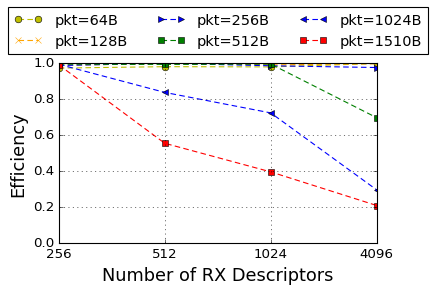

In [12]:
fig, ax = plt.subplots(facecolor='white', figsize=(5.3,3))
plt.style.use('classic')

X_LABEL = ["256", "512", "1024", "4096"]


ef_64 = [0.9717901791394838, 0.9796220254603395, 0.9784011498128787, 0.9971172651176244]
ef_128 = [0.9859277687955431, 0.998423503235286, 0.9896345812411659, 0.9962600185376459]
ef_256 = [0.9860896228955881, 0.9985297655683104, 0.9845850893702885, 0.9748790650798631]
ef_512 = [0.9933078197607912, 0.9921369391721757, 0.9940640866745031, 0.6959369224621893]
ef_1024 = [0.9928135106168569, 0.8366275935130573, 0.7227235219283789, 0.29479383588181685]
ef_1510 = [0.9897407366485036, 0.55398572742519282, 0.3950460675165658, 0.20819344574918685]

# Plot
ax.plot(X_LABEL,ef_64, marker='o', markersize=6, c='y', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=64B')
ax.plot(X_LABEL, ef_128, marker='x', markersize=6, c='orange', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=128B')
ax.plot(X_LABEL,  ef_256, marker='>', markersize=6, c='b', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=256B')
ax.plot(X_LABEL, ef_512, marker='s', markersize=6, c='g', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=512B')
ax.plot(X_LABEL,  ef_1024, marker='<', markersize=6, c='b', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=1024B')
ax.plot(X_LABEL,ef_1510, marker='s', markersize=6, c='red', linestyle='-', linewidth=1, dashes=(5, 3), label='pkt=1510B')

ax.set_xlabel(f'Number of RX Descriptors', size='16')
ax.set_ylabel('Efficiency', size='16')
ax.set_ylim(0,1)
ax.grid()
#ax.legend(loc='upper left', fontsize=15, ncol=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fontsize=13)

ax.set_xticks(X_LABEL)

# Show the plot
plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4) 

#save figure
folder_path = '..\\figure\\bridge'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, f'throughput_ddio.pdf' )
plt.savefig(file_path,bbox_inches='tight')
plt.show()

# DDIO sensitive feature

In [13]:
import pandas as pd

In [14]:
exp_ls= "combined_1024B.csv"
file_path =  f'..\\datasets\\{exp_ls}'
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 578
Columns: 156 entries, input_rate to pcm-memory_new_System-Memory
dtypes: float64(152), object(4)
memory usage: 2.7+ MB


In [15]:
data['output_rate']

Unnamed: 0
0       477.581843
1      2783.486678
2      6789.915193
3      9913.045589
4      9796.655989
          ...     
574    2701.518892
575    2930.043956
576    2955.399059
577    2966.738459
578    2973.402817
Name: output_rate, Length: 2280, dtype: float64

In [16]:
import matplotlib.pyplot as plt

#data['efficiency'] = data.iloc[:, 6]#/ data.iloc[:, 7]
#data['throughput']
efficiency_correlations = data.corr()['latency'].sort_values(ascending=False)

high_corr_columns = [(col, efficiency_correlations[col]) for col in efficiency_correlations.index 
                     if abs(efficiency_correlations[col]) > 0 and col != 'llc-way' ]
high_corr_columns =sorted(high_corr_columns, key=lambda x: abs(x[1]), reverse=True)
for col, score in high_corr_columns:
    print(f"correlationship between latency and {col}: {score}")

correlationship between latency and latency: 1.0
correlationship between latency and pcm-memory_new_SKT0-Ch0Write: -0.8149182948512621
correlationship between latency and output_rate: -0.8071445982314589
correlationship between latency and pcm-pcie_new_skt-0_PCIRdCur: -0.8022896508060537
correlationship between latency and pcm-pcie_new_skt-0_ItoM: -0.7982638828898854
correlationship between latency and bridge-pcm_Socket 0-L2MISS: -0.7908750297256298
correlationship between latency and bridge-pcm_Socket 0-L2MPI: -0.7754669528815887
correlationship between latency and pcm-memory_new_System-Write: -0.7712407657781108
correlationship between latency and bridge-pcm_Socket 0-WRITE: -0.769889625040091
correlationship between latency and pcm-memory_new_SKT0-Mem Write (MB/s): -0.7698721724113505
correlationship between latency and bridge-pcm_Socket 0-INST: 0.7688497350566456
correlationship between latency and bridge-pcm_Socket 0-INSTnom%: 0.7684883953421744
correlationship between latency and 

C:\Users\Qiong\AppData\Local\Temp\ipykernel_30200\2848310706.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  efficiency_correlations = data.corr()['latency'].sort_values(ascending=False)


In [17]:
import matplotlib.pyplot as plt

#data['efficiency'] = data.iloc[:, 6]#/ data.iloc[:, 7]
#data['throughput']
efficiency_correlations = data.corr()['output_rate'].sort_values(ascending=False)

high_corr_columns = [(col, efficiency_correlations[col]) for col in efficiency_correlations.index 
                     if abs(efficiency_correlations[col]) > 0 and col != 'llc-way' ]
high_corr_columns =sorted(high_corr_columns, key=lambda x: abs(x[1]), reverse=True)
for col, score in high_corr_columns:
    print(f"correlationship between output_rate and {col}: {score}")


correlationship between output_rate and output_rate: 1.0
correlationship between output_rate and pcm-memory_new_SKT0-Ch0Write: 0.9576413961619105
correlationship between output_rate and nf_out_rx_pps: 0.9570316221876005
correlationship between output_rate and nf_out_tx_pps: 0.9557450461061411
correlationship between output_rate and pcm-pcie_new_skt-0_PCIRdCur: 0.94867216339852
correlationship between output_rate and pcm-pcie_new_skt-0_ItoM: 0.9472840906063781
correlationship between output_rate and pcm-memory_new_System-Write: 0.9180306545113887
correlationship between output_rate and bridge-pcm_Socket 0-WRITE: 0.9180105105798854
correlationship between output_rate and pcm-memory_new_SKT0-Mem Write (MB/s): 0.9170722357282992
correlationship between output_rate and bridge-pcm_Socket 0-L2MISS: 0.9167172130938825
correlationship between output_rate and bridge-pcm_Socket 0-INST: -0.8999241158749092
correlationship between output_rate and bridge-pcm_Socket 0-L2MPI: 0.8993634982686478
correl

C:\Users\Qiong\AppData\Local\Temp\ipykernel_30200\3677600078.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  efficiency_correlations = data.corr()['output_rate'].sort_values(ascending=False)


# DDIO way tunning

In [49]:
X_LABEL = ["0x40000", "0x60000", "0x70000", "0x78000","0x7C000", "0x7F000", "0x7FF00", "0x7FFF0",]

throughput = [3658,3663,5253,9336,9799,9993,100000,100000]
throughput_variance = [375,299,1000,901,11,26,3,2]
latency=[10625087.5,10318771.6,6844698.8,3502537.4,3134199.0,2874434.7,1028040.6,890408.3]
latency_variance=[551583.8,698362.1,1317466.1,997828.3, 1376888.3, 890006.4, 191923.0, 169916.6]

DDIO_reamiss=[5100,4800,3700,2700,2000,189,0.3,0.04]

C:\Users\Qiong\AppData\Local\Temp\ipykernel_30200\669688886.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.errorbar(X_LABEL, [i/1000 for i in throughput], yerr=[i/1000 for i in throughput_variance], fmt='-o', capsize=6,
C:\Users\Qiong\AppData\Local\Temp\ipykernel_30200\669688886.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax1.errorbar(X_LABEL, [i/1000 for i in throughput], yerr=[i/1000 for i in throughput_variance], fmt='-o', capsize=6,
C:\Users\Qiong\AppData\Local\Temp\ipykernel_30200\669688886.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_LABEL, rotation=45, ha="right",fontsize=13)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_30200\669688886.py:24: UserWarning: linestyle

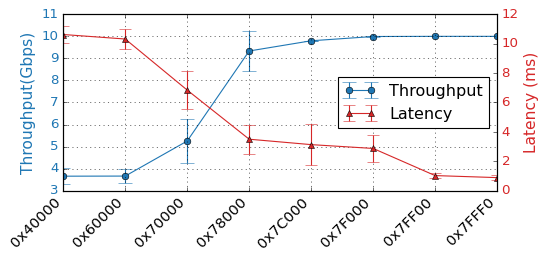

In [48]:
import matplotlib.pyplot as plt

# Data
X_LABEL = ["0x40000", "0x60000", "0x70000", "0x78000", "0x7C000", "0x7F000", "0x7FF00", "0x7FFF0"]
throughput = [3658, 3663, 5253, 9336, 9799, 9993, 10000, 10000]
throughput_variance = [375, 299, 1000, 901, 11, 26, 3, 2]
latency = [10625087.5, 10318771.6, 6844698.8, 3502537.4, 3134199.0, 2874434.7, 1028040.6, 890408.3]
latency_variance = [551583.8, 698362.1, 1317466.1, 997828.3, 1376888.3, 890006.4, 191923.0, 169916.6]

# Creating the plot
fig, ax1 = plt.subplots(facecolor='white', figsize=(7,3.4))
plt.style.use('classic')

# Plot throughput with variance on the primary y-axis
ax1.errorbar(X_LABEL, [i/1000 for i in throughput], yerr=[i/1000 for i in throughput_variance], fmt='-o', capsize=6, 
             linestyle='-',linewidth=1, marker='o', markersize=6, color='tab:blue', label='Throughput')
#ax1.set_xlabel('Configuration')
ax1.set_ylabel('Throughput(Gbps)', color='tab:blue',fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(X_LABEL, rotation=45, ha="right",fontsize=13)

# Create a secondary y-axis for latency
ax2 = ax1.twinx()
ax2.errorbar(X_LABEL, [i/1000000 for i in latency], yerr=[i/1000000 for i in latency_variance], fmt='-^', capsize=5, 
             linestyle='-',linewidth=1, marker='^', markersize=5, color='tab:red', label='Latency')
ax2.set_ylabel('Latency (ms)', color='tab:red',fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titles and layout
fig.tight_layout()  # Adjust layout
#fig.suptitle('Throughput and Latency with Variance', fontsize=16, y=1.05)
ax1.grid(True)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right')
plt.savefig('ddiotunning.pdf')
# Show plot
plt.show()
